# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Simulated_Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
# N = number of simulated customers
N = len(dataset)

# d = number of different ads (or one armed bandits)
d = len(dataset.columns)

# the number of times ad i got reward 1
numbers_of_rewards_1 = np.array([0] * d, dtype=float)

# the number of times ad i got reward 0
numbers_of_rewards_0 = np.array([0] * d, dtype=float)

# total reward accumulated
total_reward = 0

# Just for visualization
ads_selected = []
cumulative_selections = []
new_state = [0] * d
selected_ads = []

for n in range(N):
    # for each ad i take a random draw from beta distributions
    random_thetas = np.random.beta(numbers_of_rewards_1 + 1, numbers_of_rewards_0 + 1)

    # select ad with the highest theta
    ad = np.argmax(random_thetas)
    
    # update sum with simulated reward of showing the add
    reward = dataset.iat[n, ad]
    
    if reward:
        # update number of times that ad got reward 1
        numbers_of_rewards_1[ad] += 1
    else:
        # update number of times that ad got reward 0
        numbers_of_rewards_0[ad] += 1
    
    # update the total reward sum
    total_reward += reward
    
    
    ### Just for visualization:
    
    # update list of selected ads
    ads_selected.append(ad)
    
    # update cumulative selections
    new_state[ad] += 1
    cumulative_selections.append(new_state.copy())
    
    selected_ad = [0] * d
    selected_ad[ad] = 1
    selected_ads.append(selected_ad)

total_reward = total_reward.astype(int)

print(total_reward)

2612


## Visualising the results - Histogram

As Thompson Sampling algorithm is a probabilistic one, the results can vary. If you run the test several times you can see sometimes the optimal ad (here *Ad 5*) is identified in 100 rounds and sometimes not in 1000 rounds. But most often it performs better than UCB.

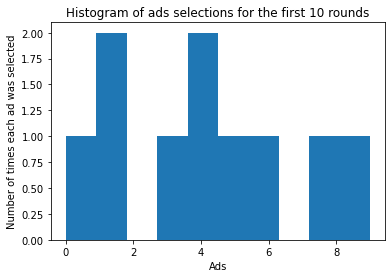

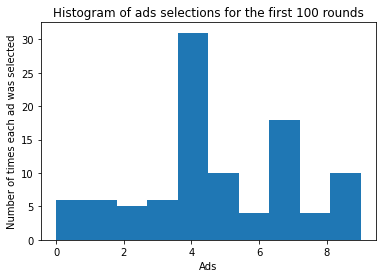

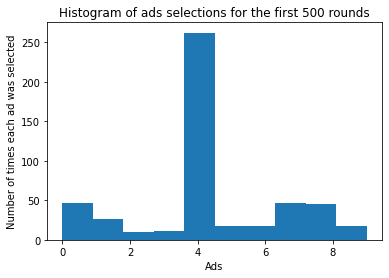

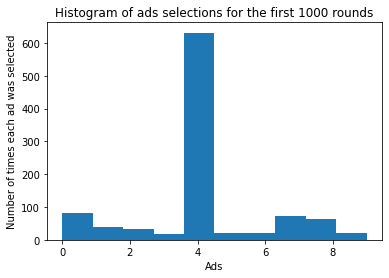

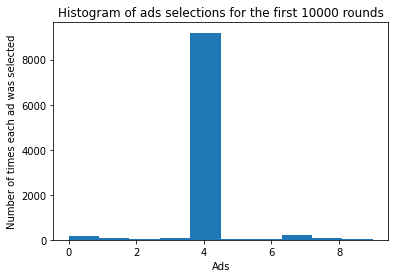

In [4]:
for n in [10, 100, 500, 1000, N]:
    plt.hist(ads_selected[:n])
    plt.title(f'Histogram of ads selections for the first {n} rounds')
    plt.xlabel("Ads")
    plt.ylabel("Number of times each ad was selected")
    plt.show()

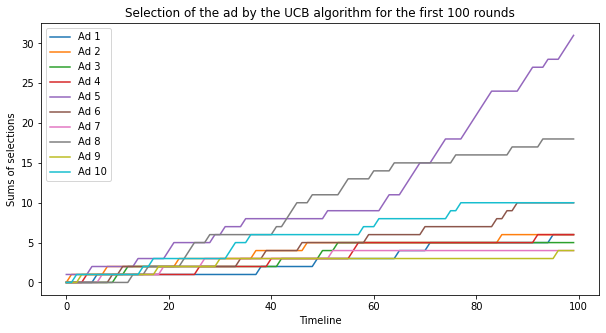

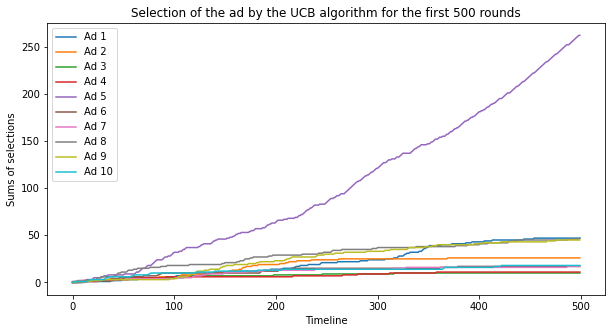

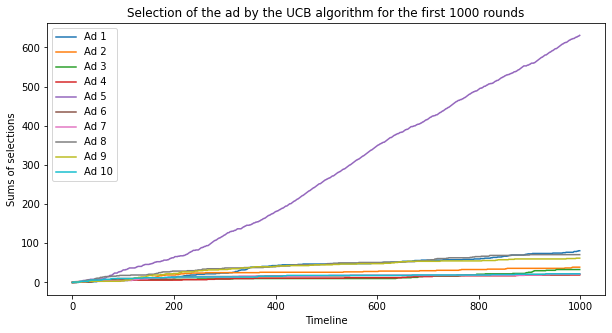

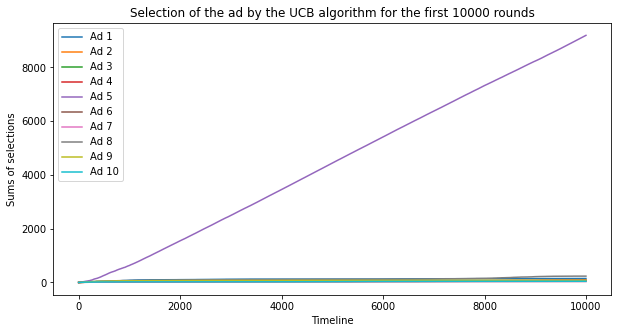

In [5]:
df = pd.DataFrame(cumulative_selections, columns = ["Ad 1", "Ad 2", "Ad 3", "Ad 4", "Ad 5", "Ad 6", "Ad 7", "Ad 8", "Ad 9", "Ad 10"])
for n in [100, 500, 1000, N]:
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(df[:n], label= df.columns.values)
    plt.title(f'Selection of the ad by the UCB algorithm for the first {n} rounds')
    plt.xlabel("Timeline")
    plt.ylabel("Sums of selections")
    plt.legend()
    plt.show()

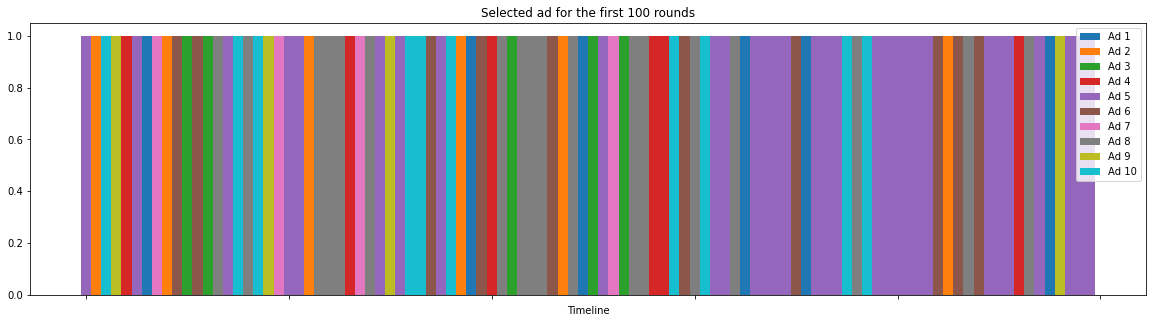

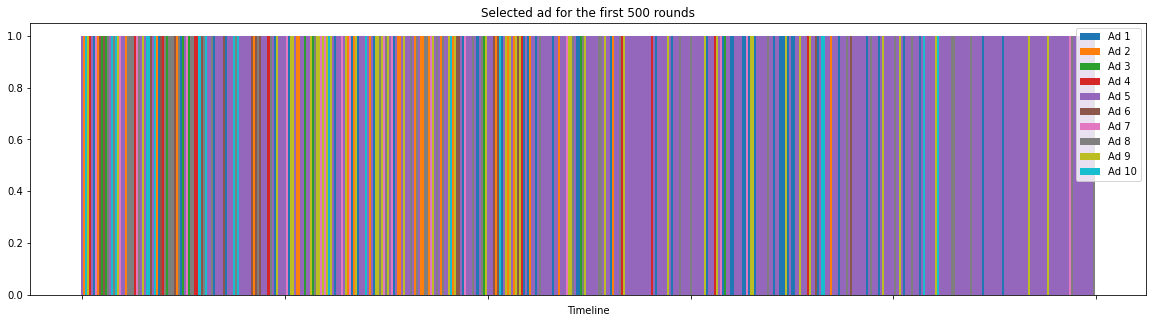

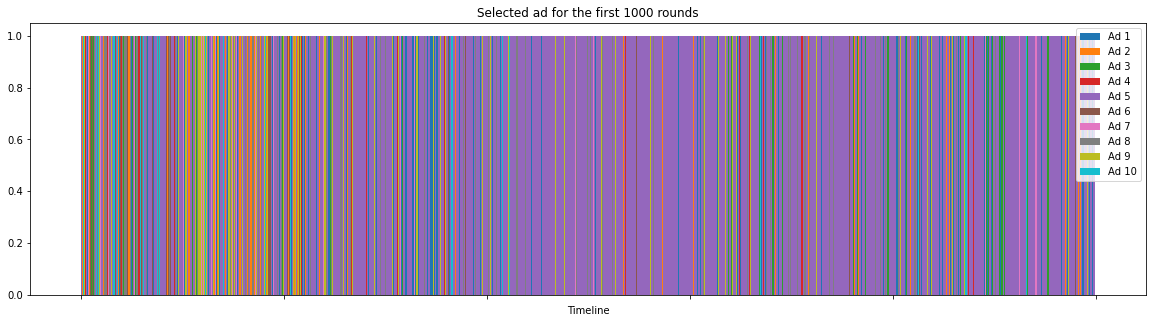

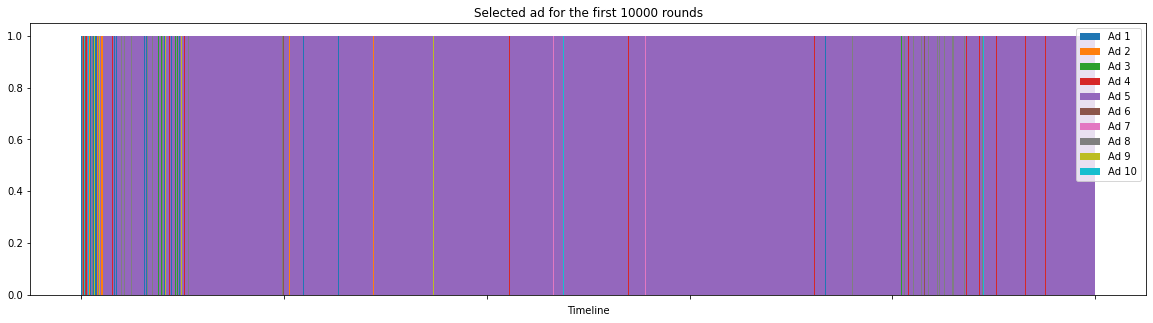

In [6]:
for n in [100, 500, 1000, N]:
    df = pd.DataFrame(selected_ads[:n], columns = ["Ad 1", "Ad 2", "Ad 3", "Ad 4", "Ad 5", "Ad 6", "Ad 7", "Ad 8", "Ad 9", "Ad 10"])
    width = 1.0
    plt.rcParams["figure.figsize"] = (20,5)
    fig, ax = plt.subplots()
    ad1=list(df.iloc[:,0])
    ad2=list(df.iloc[:,1])
    ad3=list(df.iloc[:,2])
    ad4=list(df.iloc[:,3])
    ad5=list(df.iloc[:,4])
    ad6=list(df.iloc[:,5])
    ad7=list(df.iloc[:,6])
    ad8=list(df.iloc[:,7])
    ad9=list(df.iloc[:,8])
    ad10=list(df.iloc[:,9])
    ax.bar(range(n), ad1, width, label='Ad 1')
    ax.bar(range(n), ad2, width, label='Ad 2')
    ax.bar(range(n), ad3, width, label='Ad 3')
    ax.bar(range(n), ad4, width, label='Ad 4')
    ax.bar(range(n), ad5, width, label='Ad 5')
    ax.bar(range(n), ad6, width, label='Ad 6')
    ax.bar(range(n), ad7, width, label='Ad 7')
    ax.bar(range(n), ad8, width, label='Ad 8')
    ax.bar(range(n), ad9, width, label='Ad 9')
    ax.bar(range(n), ad10, width, label='Ad 10')
    ax.set_title(f'Selected ad for the first {n} rounds')
    ax.legend(loc='upper right')
    ax.axes.xaxis.set_ticklabels([])
    plt.xlabel("Timeline")
    plt.show()